In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
from  sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree

In [2]:
iris = load_iris()

In [3]:
X = iris.data
y = iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [5]:
cl_tree = tree.DecisionTreeClassifier()

In [6]:
cl_tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [7]:
pred = cl_tree.predict(X_test)

In [8]:
pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [9]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [10]:
from sklearn.metrics import classification_report,confusion_matrix

In [11]:
print(classification_report(y_test,pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [12]:
print(confusion_matrix(y_test,pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [13]:
pip install graphviz


Note: you may need to restart the kernel to use updated packages.


In [14]:
import graphviz

In [15]:
 #   mama = tree.export_graphviz(cl_tree,out_file = None, feature_names = iris.feature_names,
  #                             class_names = iris.target_names)
   # graph = graphviz.Source(mama)
    #graph.render('iris')
    #graph

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
ran = RandomForestClassifier(n_estimators = 1000,max_features = 'sqrt')

In [18]:
ran.fit(X_train,y_train)

RandomForestClassifier(max_features='sqrt', n_estimators=1000)

In [19]:
r_pred = ran.predict(X_test)

In [20]:
r_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [21]:
y_test

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [22]:
print(confusion_matrix(r_pred,y_test))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [23]:
mama =  (classification_report(r_pred,y_test))

In [24]:
mami = pd.DataFrame(y_test)

mami

In [25]:
mami

,0
0,1
1,0
2,2
3,1
4,1
5,0
6,1
7,2
8,1
9,1


In [26]:
df = pd.read_csv("C:/Users/aravi/Downloads/archive/framingham.csv")

In [27]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [28]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='TenYearCHD', ylabel='Density'>

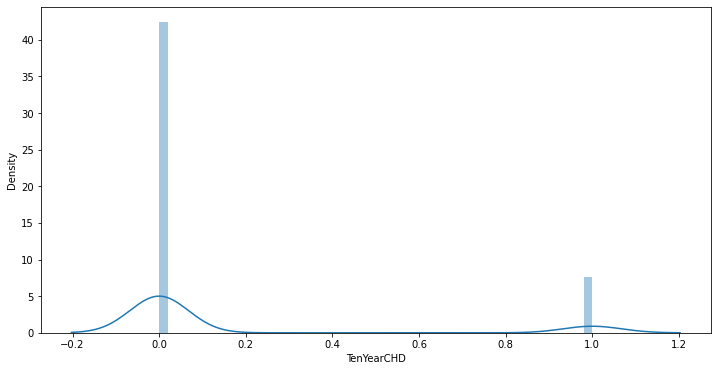

In [29]:
plt.figure(figsize = (12,6))
sns.distplot(df['TenYearCHD'])

In [30]:
df['cigsPerDay'] =df['cigsPerDay'].fillna(df['cigsPerDay'].median())
df['BPMeds'] =df['BPMeds'].fillna(df['BPMeds'].median())
df['totChol'] =df['totChol'].fillna(df['totChol'].median())
df['BMI'] =df['BMI'].fillna(df['BMI'].median())
df['glucose'] =df['glucose'].fillna(df['glucose'].median())
df['heartRate'] =df['heartRate'].fillna(df['heartRate'].median())




In [31]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            0
glucose              0
TenYearCHD           0
dtype: int64

In [32]:
df.drop('education',axis = 'columns')

,male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,78.0,0


<AxesSubplot:>

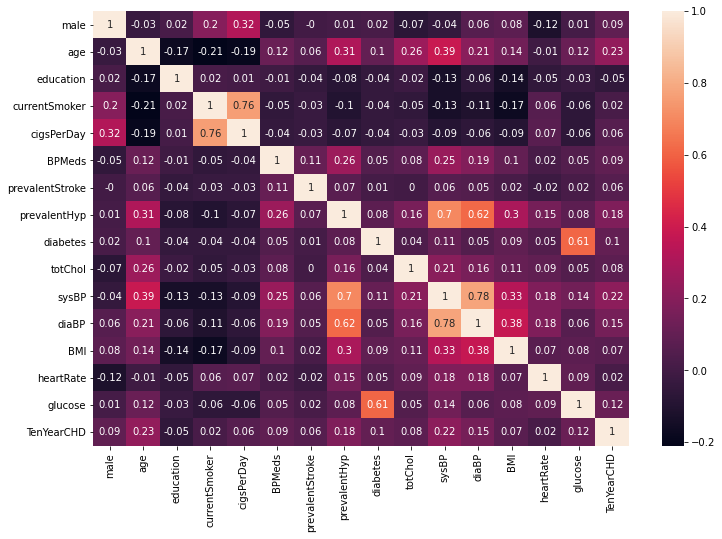

In [33]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr().round(2),annot = True)

In [34]:
X = df.drop('TenYearCHD',axis = 1)
y = df['TenYearCHD']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

In [44]:
from sklearn.linear_model import LinearRegression

In [45]:
ln = LinearRegression()

In [46]:
ln.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

In [ ]:
pred = ln.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
print(confusion_matrix(pred,y_test))

In [1]:
from  sklearn.datasets import load_iris

In [2]:
iris = load_iris()

In [3]:
X = iris.data
y = iris.target

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 1)

<IPython.core.display.Javascript object>

In [8]:
from sklearn.tree import DecisionTreeClassifier


In [9]:
dtc = DecisionTreeClassifier()

In [10]:
dtcf = dtc.fit(X_train, y_train)

In [11]:
dtcfp = dtcf.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix

In [13]:
print(classification_report(y_test,dtcfp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        13
           1       1.00      0.94      0.97        16
           2       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [14]:
print(confusion_matrix(y_test,dtcfp))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]


In [26]:
def model(name,X_train,y_train,X_test,y_test):
    a =name.fit(X_train,y_train)
    b = a.predict(X_test)
    print(classification_report(b,y_test))
    print(confusion_matrix(b,y_test))

In [27]:

from sklearn.ensemble import RandomForestClassifier

In [28]:
model(RandomForestRegressor(),X_train,y_train,X_test,y_test)

ValueError: Classification metrics can't handle a mix of continuous and multiclass targets

In [29]:
def Model(ml_model): #create a function for all models
    model = ml_model.fit(X_train,y_train)
    print('Trainning_score: {}'.format(model.score(X_train,y_train)))
    y_prediction = model.predict(X_test)
    print('Predictions are {}:\n'.format(y_prediction))
    r_score = metrics.r2_score(y_test,y_prediction)
    print('R2 Score is {}'.format(r_score))
    print('MAE IS :', metrics.mean_absolute_error(y_test,y_prediction))
    print('MSE IS :', metrics.mean_squared_error(y_test,y_prediction))
    print('RMSE IS :', np.sqrt(metrics.mean_absolute_error(y_test,y_prediction)))
    sns.distplot(y_test-y_prediction)

Trainning_score: 1.0
Predictions are [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0]:



<IPython.core.display.Javascript object>

R2 Score is 0.9536585365853658


<IPython.core.display.Javascript object>

MAE IS : 0.02631578947368421


<IPython.core.display.Javascript object>

MSE IS : 0.02631578947368421


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RMSE IS : 0.16222142113076254


<IPython.core.display.Javascript object>

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


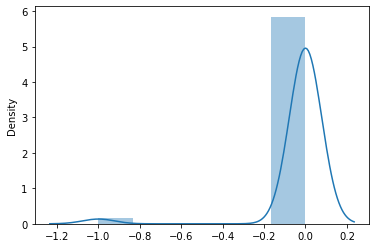

In [30]:
Model(RandomForestClassifier())

In [31]:
from sklearn.ensemble import AdaBoostClassifier

Trainning_score: 0.9553571428571429
Predictions are [0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2 1 2 1 2 2 0 1
 0]:



<IPython.core.display.Javascript object>

R2 Score is 0.9536585365853658


<IPython.core.display.Javascript object>

MAE IS : 0.02631578947368421


<IPython.core.display.Javascript object>

MSE IS : 0.02631578947368421


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

RMSE IS : 0.16222142113076254


<IPython.core.display.Javascript object>

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


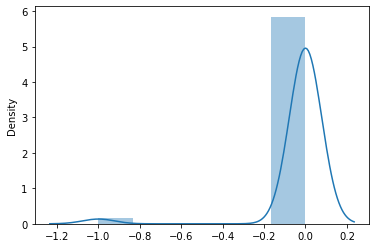

In [32]:
Model(AdaBoostClassifier())

In [33]:
df = pd.read_csv("C:/Users/aravi/Downloads/archive/framingham.csv")

<IPython.core.display.Javascript object>

In [34]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [35]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [36]:
df.shape

(4238, 16)

In [38]:
df['prevalentStroke'].value_counts()

0    4213
1      25
Name: prevalentStroke, dtype: int64

In [40]:
df['diabetes'].value_counts()

0    4129
1     109
Name: diabetes, dtype: int64

In [43]:
df['cigsPerDay'] = df['cigsPerDay'].fillna(df['cigsPerDay'].mean())
df['BPMeds'] = df['BPMeds'].fillna(df['BPMeds'].mean())


In [47]:
af = ['totChol','BMI','heartRate','glucose','education']
for i in af:
        df[i] = df[i].fillna(df[i].mean())
    

In [48]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [49]:
df['TenYearCHD'].value_counts()

0    3594
1     644
Name: TenYearCHD, dtype: int64

In [52]:
X = df.drop('TenYearCHD',axis = 1)
y = df['TenYearCHD']

In [53]:
from sklearn.model_selection import train_test_split

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [55]:
from sklearn.metrics import confusion_matrix, classification_report

In [62]:
def Model(name):
    a = name.fit(X_train,y_train)
    print("Trainning Score:", a.score(X_train,y_train))
    b = a.predict(X_test)
    print(classification_report(y_test,b))
    print("          ***                  ")
    print(confusion_matrix(y_test,b))
    sns.distplot(y_test-b)

Trainning Score: 1.0
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1194
           1       0.20      0.25      0.22       205

    accuracy                           0.75      1399
   macro avg       0.53      0.54      0.54      1399
weighted avg       0.77      0.75      0.76      1399

          ***                  
[[993 201]
 [154  51]]


<IPython.core.display.Javascript object>

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


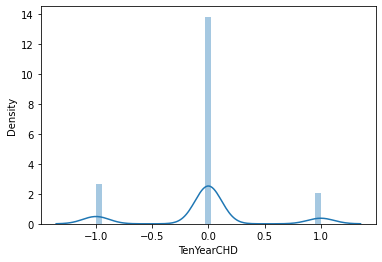

In [63]:
Model(DecisionTreeClassifier())

In [66]:
from sklearn.ensemble import RandomForestClassifier

Trainning Score: 1.0
              precision    recall  f1-score   support

           0       0.86      1.00      0.92      1194
           1       0.72      0.06      0.12       205

    accuracy                           0.86      1399
   macro avg       0.79      0.53      0.52      1399
weighted avg       0.84      0.86      0.81      1399

          ***                  
[[1189    5]
 [ 192   13]]


<IPython.core.display.Javascript object>

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


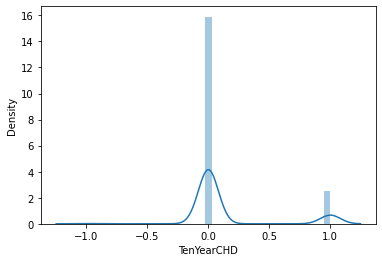

In [68]:
Model(RandomForestClassifier())

In [69]:
from sklearn.neighbors import KNeighborsClassifier

Trainning Score: 0.8594575554772808
              precision    recall  f1-score   support

           0       0.86      0.96      0.91      1194
           1       0.29      0.10      0.15       205

    accuracy                           0.83      1399
   macro avg       0.58      0.53      0.53      1399
weighted avg       0.78      0.83      0.80      1399

          ***                  
[[1146   48]
 [ 185   20]]


<IPython.core.display.Javascript object>

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


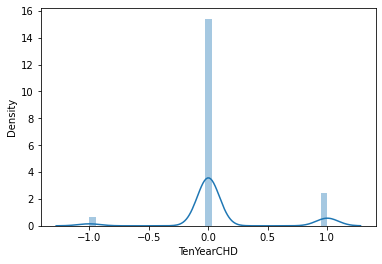

In [71]:
Model(KNeighborsClassifier())

Trainning Score: 0.8548784783374428
              precision    recall  f1-score   support

           0       0.86      0.98      0.92      1194
           1       0.54      0.10      0.17       205

    accuracy                           0.86      1399
   macro avg       0.70      0.54      0.55      1399
weighted avg       0.82      0.86      0.81      1399

          ***                  
[[1176   18]
 [ 184   21]]


<IPython.core.display.Javascript object>

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


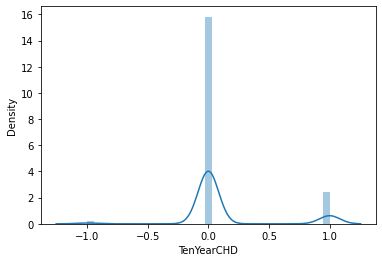

In [74]:
Model(AdaBoostClassifier())

In [75]:
from sklearn.svm import SVC
#svclassifier = SVC(kernel='linear')

Trainning Score: 0.8453680873547024
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1194
           1       0.00      0.00      0.00       205

    accuracy                           0.85      1399
   macro avg       0.43      0.50      0.46      1399
weighted avg       0.73      0.85      0.79      1399

          ***                  
[[1194    0]
 [ 205    0]]


C:\Users\aravi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


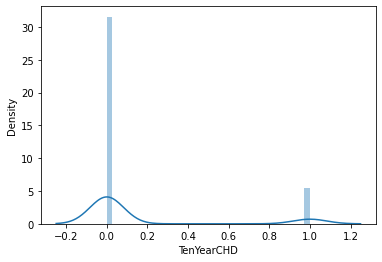

In [76]:
Model(SVC(kernel='linear'))

In [77]:
from sklearn.ensemble import GradientBoostingClassifier

Trainning Score: 0.8453680873547024
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      1194
           1       0.00      0.00      0.00       205

    accuracy                           0.85      1399
   macro avg       0.43      0.50      0.46      1399
weighted avg       0.73      0.85      0.79      1399

          ***                  
[[1194    0]
 [ 205    0]]


C:\Users\aravi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aravi\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<IPython.core.display.Javascript object>

C:\Users\aravi\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


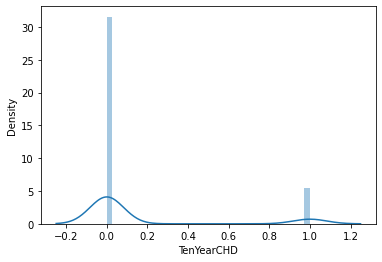

In [79]:
Model(GradientBoostingClassifier(n_estimators=20, learning_rate= 0.05, max_features=2, max_depth=2, random_state=0))

In [80]:
from xgboost import XGBClassifier

ModuleNotFoundError: No module named 'xgboost'

In [81]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.
